***Analyse, classification et prédiction de consommation d’électricité en France par des techniques de machine learning***






# Introduction
L'analyse, la classification et la prédiction de la consommation d'électricité sont des sujets importants pour comprendre et améliorer l'efficacité énergétique. Les techniques de machine learning peuvent être utilisées pour extraire des informations utiles à partir de données de consommation d'électricité, ainsi que pour prédire les tendances futures de consommation. Cette analyse peut aider les entreprises de l'industrie électrique à mieux comprendre les comportements de consommation de leurs clients, ainsi qu'à développer des stratégies pour améliorer l'efficacité énergétique à tous les niveaux

La production d'électricité en France varie en fonction de différents facteurs, tels que la demande, les conditions météorologiques, les contraintes techniques et les politiques énergétiques. La France importe également une partie de son électricité pour répondre à sa demande.

Nous verrons comment les algorithmes d'apprentissage automatique peuvent être utilisés pour extraire des informations précieuses à partir de données de consommation d'électricité, telles que les modèles de consommation, les tendances de consommation et les prévisions de consommation future

In [1]:
# -*- coding: utf-8 -*-
#importer les librairies dont nous aurons besoin pour ce projet
#Matplotlib est la librairie qui permet de visualiser nos Datasets, nos fonctions, nos résultats sous forme de graphiques, courbes et nuages de points.
import matplotlib.pyplot as plt
#pandas pour l'extraction des données et le traitement
import pandas as pd
#Numpy pour manipuler notre Dataset en tant que matrice
import numpy as np
import statsmodels.api as sm

#our l'affichage des donnée tableau
from IPython.display import display

#Calculez les quantiles d'un diagramme de probabilité et affichez éventuellement le diagramme
from statsmodels.graphics.gofplots import ProbPlot

#pour ignorer tous les avertissements qui pourraient être générés pendant l'exécution du code
import warnings                                  
warnings.filterwarnings('ignore')

from matplotlib.pyplot import figure



## Nettoyage, Analyse

Analyse, classification et prédiction de consommation d’électricité par des techniques de machine learning qui s’inscrit dans le contexte de l’analyse des données (Data Analytics)
*Source de nos données*\
[Données en énergie (consolidées et définitives) RTE FRANCE](https://www.rte-france.com/eco2mix/telecharger-les-indicateurs)\
Elles concernent la France et les 12 régions administratives.\
[Calcul des degrés jours unifiés (DJU) CEGIBAT](https://cegibat.grdf.fr/simulateur/calcul-dju)\
Cet outil, réalisé en partenariat avec Météo France, permet de calculer les degrés jour (DJ ou DJU) chauffage ou climatisation sur une période, une station météo et un seuil de température donnés.\

*Les données de l'energie sont exprimées en Gigawatt (GWh).* 

In [2]:
#Traitement du jeu de donnée

#Chargement du dataset 'new_data - new_data.csv'
data_coso_prod=pd.read_csv("new_data - new_data.csv")
#afficher les 10 prémière ligne des données importées
data_coso_prod.iloc[35:].head(15)

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique,Unnamed: 22
35,2012-12,Données définitives,France,54715,39912.0,5319.0,1714.0,548.0,3057.0,6521.0,...,49602,4367.0,6716.0,2349.0,529.0,-30.0,1292.0,1718.0,859.0,NaN
36,2013-01,Données définitives,Grand-Est,9924,7258.0,1508.0,928.0,8.0,570.0,814.0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2013-01,Données définitives,Nouvelle-Aquitaine,5644,4801.0,187.0,NaN,0.0,186.0,465.0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,2013-01,Données définitives,Auvergne-Rhône-Alpes,13119,9641.0,278.0,0.0,49.0,227.0,3047.0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2013-01,Données définitives,Bourgogne-Franche-Comté,403,NaN,244.0,75.0,0.0,168.0,121.0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2013-01,Données définitives,Bretagne,246,NaN,49.0,NaN,1.0,48.0,56.0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,2013-01,Données définitives,Centre-Val de Loire,7965,7717.0,70.0,NaN,2.0,67.0,24.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2013-01,Données définitives,France,57739,42406.0,6301.0,2566.0,393.0,3342.0,6906.0,...,53619,3484.0,6604.0,3120.0,493.0,91.0,1499.0,1666.0,-265.0,NaN
43,2013-01,Données définitives,Ile-de-France,870,NaN,753.0,195.0,37.0,520.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2013-01,Données définitives,Occitanie,3450,1853.0,76.0,NaN,10.0,65.0,1214.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Collecte et pré-traitement de données de consommation
Création du dataset de consommation mensuelle d'électricité en France

In [3]:
#On prend juste les données de la france
#Copier dans consommation
consommation=data_coso_prod.copy()
#Trier et extraire seulement ce qui nous intéresse
consommation=consommation[['Mois', 'Territoire', 'Consommation totale']]
#On récupère les information où Territoire=France et on laisse les données des régions
consommation=consommation[consommation['Territoire']=='France']
#Eliminer les données manquantes
consommation.drop('Territoire', axis=1, inplace=True)
#renommer les colonnes Mois et Consommation Totale
consommation.rename(columns={'Mois': 'mois', 'Consommation totale': 'consommationT'}, inplace=True)
#Aperçu des données mensuelles de consommation totale d'électricité de notre copy consommation
display(consommation.head())
#nobre de ligne et de colonne
display(consommation.shape)

,mois,consommationT
0,2010-01,56342
1,2010-02,48698
2,2010-03,48294
3,2010-04,38637
4,2010-05,37284


(143, 2)

In [4]:
#Triez par les valeurs le long de chaque axe mois par ordre croissant
consommation.sort_values(by='mois', ascending=True).head()

,mois,consommationT
0,2010-01,56342
1,2010-02,48698
2,2010-03,48294
3,2010-04,38637
4,2010-05,37284


In [5]:
#Changement du type de Series en datetime
#Changement d'index pour que la série temporelle soit reconnue
consommation['mois'] = pd.to_datetime(consommation['mois'])
consommation.set_index('mois', inplace=True)
#Visualisation des données selon l'indice temporel mois/année
#print(consommation)
consommation.head()

,consommationT
mois,
2010-01-01,56342
2010-02-01,48698
2010-03-01,48294
2010-04-01,38637
2010-05-01,37284


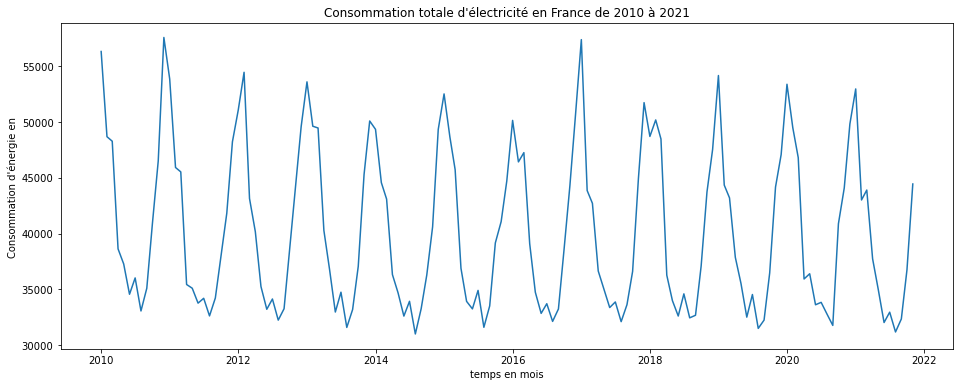

In [6]:
#Visualisation de la consommation totale d'électricité en énergie 
figure(figsize=(16, 6))
plt.plot(consommation.consommationT)
plt.title("Consommation totale d'électricité en France de 2010 à 2021")
plt.xlabel("temps en mois") #Titre de l'axe des abscisses
plt.ylabel("Consommation d'énergie en ")#Titre de l'axe des ordonnées
plt.show()#Tracer le graphe

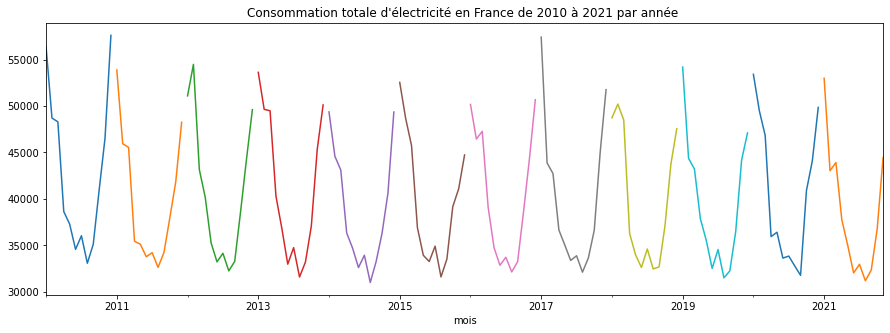

In [7]:
#Consommation totale d'électricité en France de 2010 à 2021 par année 
figure(figsize=(15, 5))
consommation['consommationT'].resample('Y').plot(title='Consommation totale d\'électricité en France de 2010 à 2021 par année ')
plt.show()

In [8]:
#La fonction aggregate pour rassembler les statistique(moyenne, écart type, min, max)
consommation['consommationT'].resample('Y').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
mois,,,,
2010-12-31,42756.333333,8528.680611,33069,57600
2011-12-31,39898.916667,6996.660937,32625,53873
2012-12-31,40793.083333,7718.614801,32247,54476
2013-12-31,41236.833333,7937.459381,31591,53619
2014-12-31,38762.500000,6471.028154,31004,49359
2015-12-31,39670.833333,6866.459334,31603,52536
2016-12-31,40268.250000,7118.985948,32132,50670
2017-12-31,40167.333333,8086.311243,32110,57406
2018-12-31,39869.250000,7234.222923,32451,50202


            consommationT
mois                     
2010-12-31         513076
2011-12-31         478787
2012-12-31         489517
2013-12-31         494842
2014-12-31         465150
2015-12-31         476050
2016-12-31         483219
2017-12-31         482008
2018-12-31         478431
2019-12-31         473739
2020-12-31         488938
2021-12-31         422419


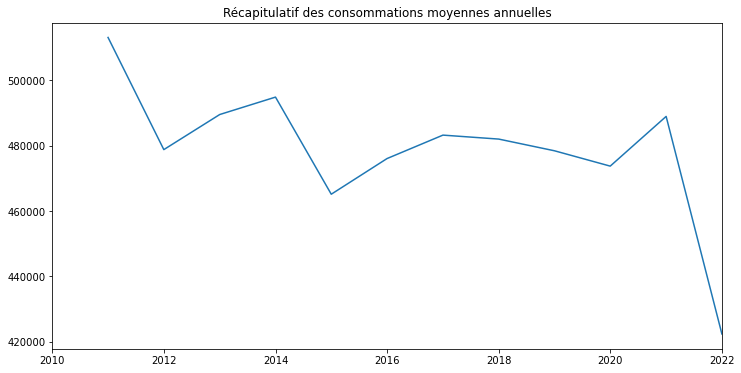

In [9]:
#Récapitulatif des consommations moyennes annuelles
conso_annu=consommation.resample('Y').sum()
print(conso_annu)
figure(figsize=(12, 6))
plt.plot(conso_annu.consommationT)
plt.title("Récapitulatif des consommations moyennes annuelles")
plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2022-01-01'))
plt.show()#Tracer le graphe


# Collecte et pré-traitement de données de production
Création du dataset de production mensuelle d'électricité en France

In [10]:
#On prend juste les données de la production d'électricité la france
#Copier dans production
production=data_coso_prod.copy()
#Trier et extraire seulement ce qui nous intéresse
production=production[['Mois', 'Territoire', 'Production totale']]
#On récupère les information où Territoire=France et on laisse les données des régions
production=production[production['Territoire']=='France']
#Eliminer les données manquantes
production.drop('Territoire', axis=1, inplace=True)
#renommer les colonnes Mois et Production totale
production.rename(columns={'Mois': 'mois', 'Production totale': 'productionT'}, inplace=True)
#Aperçu des données mensuelles de consommation totale d'électricité de notre copy consommation
display(production.head())
#nobre de ligne et de colonne
display(production.shape)

,mois,productionT
0,2010-01,56542
1,2010-02,50406
2,2010-03,51071
3,2010-04,41693
4,2010-05,39847


(143, 2)

In [11]:
#Triez par les valeurs le long de chaque axe mois par ordre croissant
production.sort_values(by='mois', ascending=True).head()

,mois,productionT
0,2010-01,56542
1,2010-02,50406
2,2010-03,51071
3,2010-04,41693
4,2010-05,39847


In [12]:
#Changement du type de Series en datetime
#Changement d'index pour que la série temporelle soit reconnue
production['mois'] = pd.to_datetime(production['mois'])
production.set_index('mois', inplace=True)
#Visualisation des données selon l'indice temporel mois-année
#print(consommation)
production.head()

,productionT
mois,
2010-01-01,56542
2010-02-01,50406
2010-03-01,51071
2010-04-01,41693
2010-05-01,39847


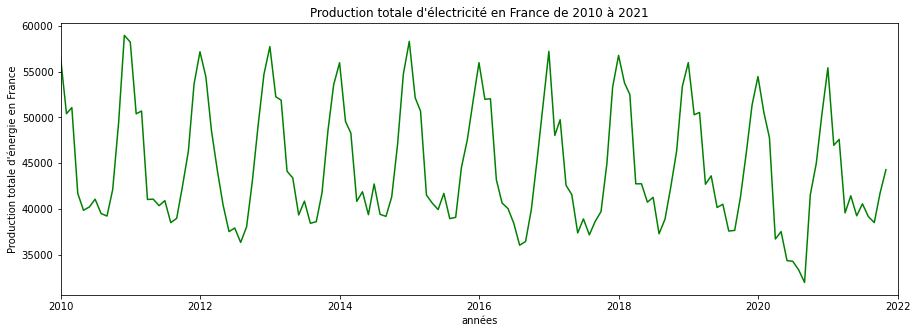

In [13]:
#Visualisation de la consommation totale d'électricité.
figure(figsize=(15, 5))
plt.plot(production.productionT, c='g')
plt.title("Production totale d'électricité en France de 2010 à 2021")
plt.xlabel("années") #Titre de l'axe des abscisses
plt.ylabel("Production totale d'énergie en France")#Titre de l'axe des ordonnées
plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2022-01-01'))
plt.show()#Tracer le graphe

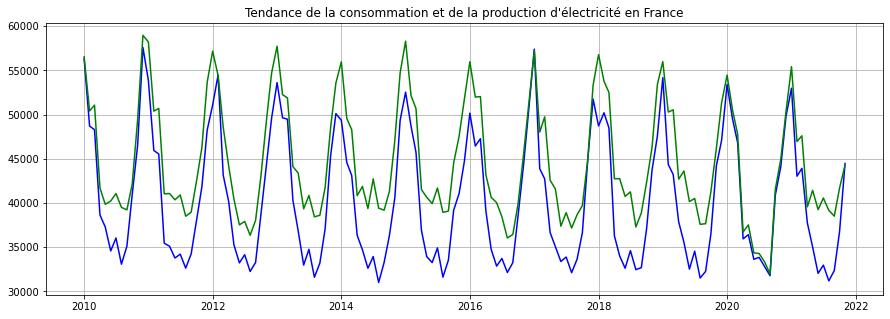

In [14]:
figure(figsize=(15, 5))
plt.plot(consommation.consommationT, c='b')
plt.title('Tendance de la consommation et de la production d\'électricité en France')
plt.plot(production.productionT, c='g')
plt.grid(True)
plt.show()#Tracer le graphe

In [15]:
#Création d'un échantillon de travail par jointure des deux précédents dataframe (Consommation, Production)
#inner = prendre les donnée de meme longueure comme clé "mois" avace la fonction merge
conso_prod = pd.merge(consommation, production, how='inner', on='mois')
conso_prod.head()

,consommationT,productionT
mois,,
2010-01-01,56342,56542
2010-02-01,48698,50406
2010-03-01,48294,51071
2010-04-01,38637,41693
2010-05-01,37284,39847


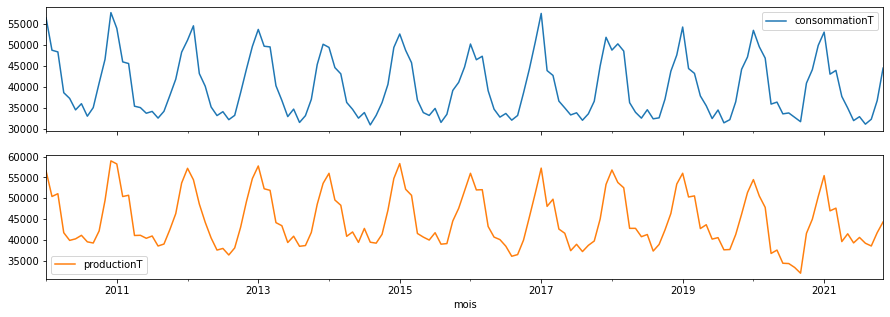

In [16]:
#Visualisation de la consommation et de la production
conso_prod[['consommationT', 'productionT']].plot(subplots=True, figsize=(15, 5))
plt.show()

En général, il y a toujours un équilibre entre l'offre et la demande d'électricité en France, mais il peut y avoir des fluctuations au cours du temps en fonction de différents facteurs, tels que la météo, les besoins énergétiques saisonniers, limportation et l'exportation...
La France produit environ 500 TWh d'électricité par an, tandis que sa consommation est d'environ 550 TWh par an. La différence est comblée par des importations d'électricité.

C'est pour quoi, pour faire une prévision de la demande en électricité on va utiliser les données de météo france sur l'utilisation du chauffage en France.

Le degré jour unifié (DJU) est la différence entre la température extérieure et une température de référence qui permet de réaliser des estimations de consommations d'énergie thermique pour maintenir un bâtiment confortable en proportion de la rigueur de l'hiver ou de la chaleur de l'été.

Le degré jour est une valeur représentative de l’écart entre la température d’une journée donnée et un seuil de température préétabli (18 °C dans le cas des DJU ou Degré Jour Unifié). Sommés sur une période, ils permettent de calculer les besoins de chauffage et de climatisation d’un bâtiment.

# Création du dataset dju chauffage mensuelle en France 

In [17]:
#Voyons l'impact du chauffage électrique
#Chargement du dataset 'dju.xlsx'
data_chauff = pd.read_csv('chauff_calcul_DJU.xlsx - DJU - Mensuel.csv', header=None, skiprows=11)
#A partir de la ligne 11 du file excel
data_chauff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
1,2022.0,385.4,269.8,226.7,171.9,41,1.7,0,0,0,0,0,0,1096.4
2,2021.0,396.7,302.8,271,228.3,138.3,11.1,0.2,5.1,21,150.7,310.8,323.8,2159.4
3,2020.0,339,249.6,268.6,81.4,65.7,20.6,0.9,4.5,34.3,157.5,227.2,336.8,1785.9
4,2019.0,404.9,268.3,233.1,168.5,117.9,24.4,0,1.7,26.7,133.7,282.6,327.3,1989


In [18]:
#Comme l'année 2022 n'est pas encore fini, on va devoir travailler jusqu'à l'année 2021 
#Suppression des deux premières lignes et dernière Series
data_chauff.drop([0, 1], axis=0, inplace=True)
data_chauff.drop([13], axis=1, inplace=True)
data_chauff.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,2021.0,396.7,302.8,271,228.3,138.3,11.1,0.2,5.1,21,150.7,310.8,323.8
3,2020.0,339,249.6,268.6,81.4,65.7,20.6,0.9,4.5,34.3,157.5,227.2,336.8
4,2019.0,404.9,268.3,233.1,168.5,117.9,24.4,0,1.7,26.7,133.7,282.6,327.3
5,2018.0,303.4,432.6,314.3,119.7,55.9,8.1,0,3.3,34.3,122.4,282.5,325.9
6,2017.0,467.9,278.4,206.1,182.6,75,9.4,1,6.8,62.6,99.4,282.6,369
7,2016.0,364.4,321.6,321.1,212.1,88.1,27.5,5.7,3.2,11.7,176,285.6,390.8
8,2015.0,392,365.7,275.5,141.1,91.5,15.8,6.9,6.1,71.9,176.9,195,248.1
9,2014.0,324.4,281.9,223.9,135.5,100.2,19.1,8.3,19.3,16,92.3,222.6,368.2
10,2013.0,429.2,402.2,376.6,209.5,158.4,43.6,0.6,5,41.5,105,303.9,349.5
11,2012.0,336,435.9,201.9,230.3,83.3,35,12.4,2.4,58,154.6,296.2,345.9


In [19]:
#La première series est considérée comme index
data_chauff[0] = data_chauff[0].astype(int)
data_chauff.set_index([0], inplace=True)
data_chauff.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
2021,396.7,302.8,271,228.3,138.3,11.1,0.2,5.1,21,150.7,310.8,323.8
2020,339,249.6,268.6,81.4,65.7,20.6,0.9,4.5,34.3,157.5,227.2,336.8
2019,404.9,268.3,233.1,168.5,117.9,24.4,0,1.7,26.7,133.7,282.6,327.3
2018,303.4,432.6,314.3,119.7,55.9,8.1,0,3.3,34.3,122.4,282.5,325.9
2017,467.9,278.4,206.1,182.6,75,9.4,1,6.8,62.6,99.4,282.6,369
2016,364.4,321.6,321.1,212.1,88.1,27.5,5.7,3.2,11.7,176,285.6,390.8
2015,392,365.7,275.5,141.1,91.5,15.8,6.9,6.1,71.9,176.9,195,248.1
2014,324.4,281.9,223.9,135.5,100.2,19.1,8.3,19.3,16,92.3,222.6,368.2
2013,429.2,402.2,376.6,209.5,158.4,43.6,0.6,5,41.5,105,303.9,349.5


In [20]:
#Il est nécessaire de transformer ces données de manière à obtenir une matrice temporelle.
#Transformation des données 
dju = {'mois':[],'dju_chauffage':[]}
for year in data_chauff.index.values:
    for month in data_chauff.columns:
        dju['mois'].append(f"{year}-{month}")
        dju['dju_chauffage'].append(data_chauff.loc[year,month])
dju = pd.DataFrame(dju)
dju.head()

,mois,dju_chauffage
0,2021-1,396.7
1,2021-2,302.8
2,2021-3,271
3,2021-4,228.3
4,2021-5,138.3


In [21]:
dju.sort_values(by='mois', ascending=True).head()
#Indexation des données selon les mois d'enregistrement
dju['mois'] = pd.to_datetime(dju['mois'])
dju.set_index('mois', inplace=True)
print(dju)

           dju_chauffage
mois                    
2021-01-01         396.7
2021-02-01         302.8
2021-03-01           271
2021-04-01         228.3
2021-05-01         138.3
...                  ...
2010-08-01          11.1
2010-09-01          52.3
2010-10-01         172.2
2010-11-01           310
2010-12-01           512

[144 rows x 1 columns]


In [22]:
dju_data=dju.sort_values(by='mois', ascending=True).head(144)
print(dju_data)


           dju_chauffage
mois                    
2010-01-01         499.2
2010-02-01         371.4
2010-03-01         294.5
2010-04-01         165.3
2010-05-01         140.9
...                  ...
2021-08-01           5.1
2021-09-01            21
2021-10-01         150.7
2021-11-01         310.8
2021-12-01         323.8

[144 rows x 1 columns]


In [23]:
#L'extraction des données traités
#Enregistrer les données dans un fichier csv
dju_data.to_csv('data_rec - Feuille 1.csv', index=True, encoding='utf-8')

In [24]:
#Les donnée de l'utilisation de chauffage en France en DJU=Degré jour unifié

#indexer par dates
dju_donnee=pd.read_csv('data_rec - Feuille 1.csv', index_col='mois', parse_dates=True) 
print(dju_donnee)

            dju_chauffage
mois                     
2010-01-01          499.2
2010-02-01          371.4
2010-03-01          294.5
2010-04-01          165.3
2010-05-01          140.9
...                   ...
2021-08-01            5.1
2021-09-01           21.0
2021-10-01          150.7
2021-11-01          310.8
2021-12-01          323.8

[144 rows x 1 columns]


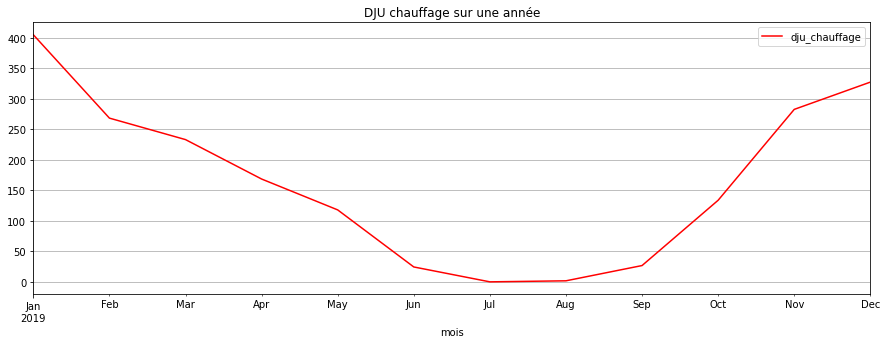

In [25]:
#Courbe sur l'année 2019
dju_donnee['2019'].plot(figsize=(15, 5), title='DJU chauffage sur une année', color='r')
plt.grid(True)
plt.show()

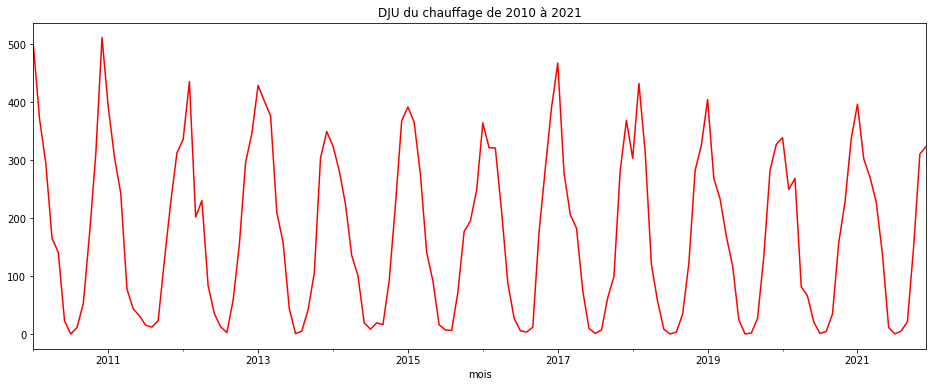

In [26]:
#Visualisation des données mensuelles des Degrés Jour Unifiés (DJU) chauffage électrique
figure(figsize=(16, 6))
dju_donnee['dju_chauffage'].plot(title='DJU du chauffage de 2010 à 2021', color='r')
plt.show()


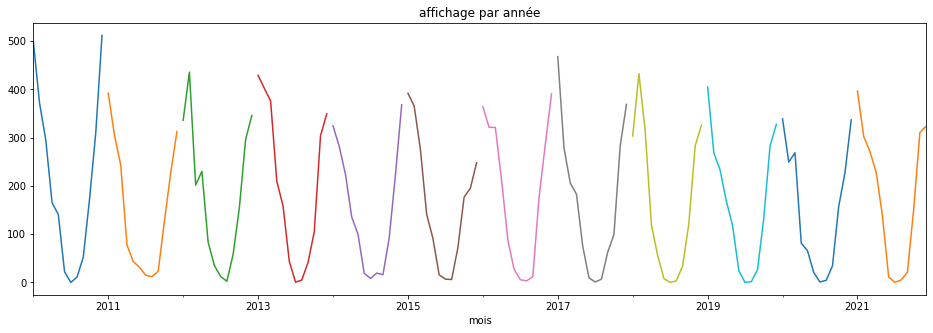

In [27]:
#Afficher les donnée par année
plt.figure(figsize=(16, 5))
dju_donnee['dju_chauffage'].resample('Y').plot(title='affichage par année')
plt.show()

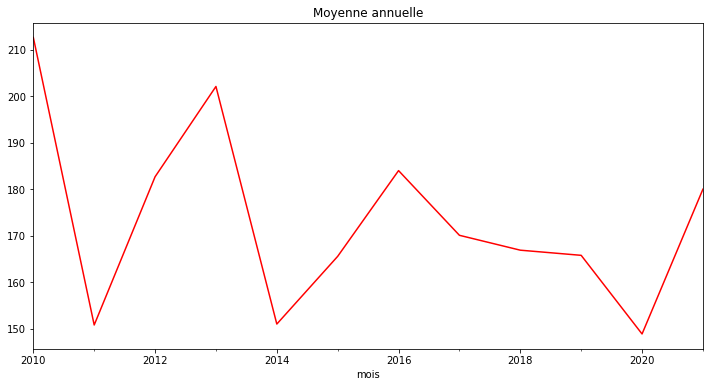

In [28]:
#Courbe sur toute la durée de moyenne annuelle mean()= Moyenne
figure(figsize=(12, 6))
dju_donnee['dju_chauffage'].resample('Y').mean().plot(title='Moyenne annuelle', color='r')
plt.show()

## Un peut de statistiques sur nos données

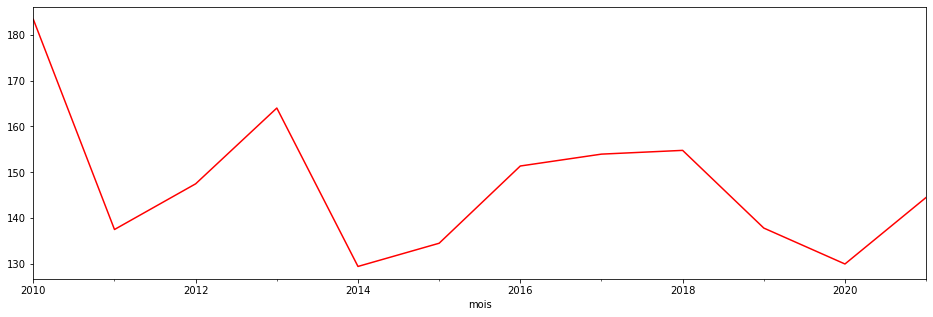

In [29]:
#On va afficher l'écart type
#une mesure de la dispersion des valeurs d'un échantillon statistique
figure(figsize=(16, 5))
dju_donnee['dju_chauffage'].resample('Y').std().plot(color='r')
plt.show()

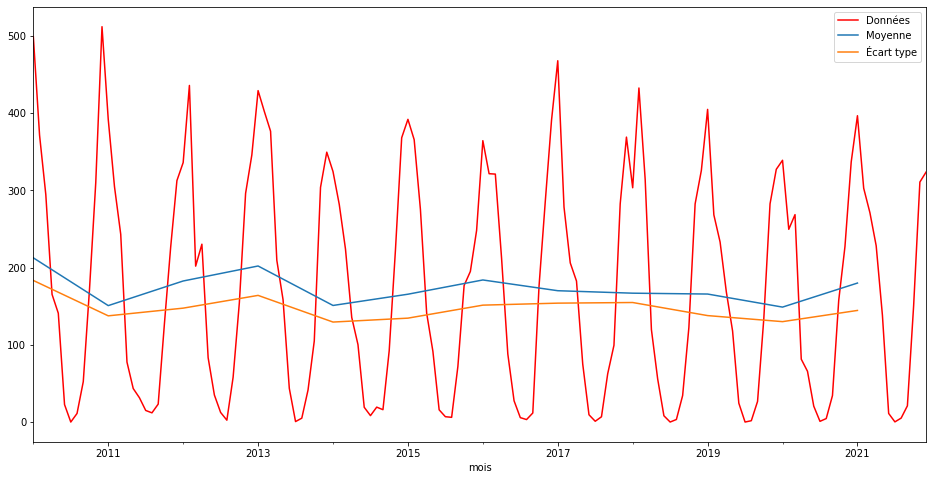

In [30]:
plt.figure(figsize=(16, 8))
dju_donnee['dju_chauffage'].plot(color='r')
dju_donnee['dju_chauffage'].resample('Y').mean().plot()#La moyenne
dju_donnee['dju_chauffage'].resample('Y').std().plot()#L'ecart type

# Ajout de la légende
plt.legend(['Données', 'Moyenne', 'Écart type'])

plt.show()


In [31]:
#Statistiques descriptives de l'échantillon dju
dju_donnee.describe().T

,count,mean,std,min,25%,50%,75%,max
dju_chauffage,144.0,173.346528,143.640781,0.0,26.125,156.05,302.95,512.0


In [32]:
#Statistiques descriptives de l'échantillon de la consommation d'életricité en France
consommation.describe().T

,count,mean,std,min,25%,50%,75%,max
consommationT,143.0,40183.048951,7202.641671,31004.0,33858.5,37284.0,45838.0,57600.0


In [33]:
#La fonction aggregate pour rassemnbler les statistique(moyenne, ecart type, min, max)
dju_donnee['dju_chauffage'].resample('Y').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
mois,,,,
2010-12-31,212.625000,183.352408,0.0,512.0
2011-12-31,150.775000,137.534849,11.9,392.0
2012-12-31,182.658333,147.496542,2.4,435.9
2013-12-31,202.083333,164.015741,0.6,429.2
2014-12-31,150.975000,129.480270,8.3,368.2
2015-12-31,165.541667,134.539609,6.1,392.0
2016-12-31,183.983333,151.379300,3.2,390.8
2017-12-31,170.066667,153.968228,1.0,467.9
2018-12-31,166.866667,154.787158,0.0,432.6


# Création d'un échantillon de travail par jointure des deux précédents dataframe

On va rassembler les données du dataset consommation et du dataset dju_donnee


In [34]:
#inner = prendre les donnée de meme longueure comme clé "mois" avace la fonction merge
conso_dju = pd.merge(consommation, dju_donnee, how='inner', on='mois')
print(conso_dju)

            consommationT  dju_chauffage
mois                                    
2010-01-01          56342          499.2
2010-02-01          48698          371.4
2010-03-01          48294          294.5
2010-04-01          38637          165.3
2010-05-01          37284          140.9
...                   ...            ...
2021-07-01          32959            0.2
2021-08-01          31184            5.1
2021-09-01          32350           21.0
2021-10-01          36762          150.7
2021-11-01          44458          310.8

[143 rows x 2 columns]


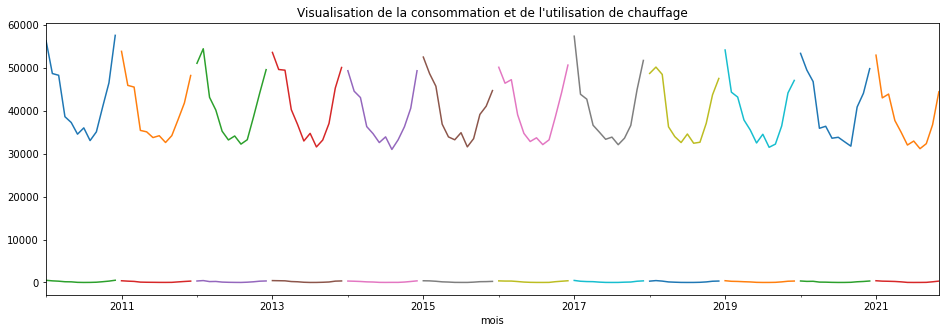

In [35]:
#Visualisation de la consommation et de l'utilisation de chauffage
conso_dju[['consommationT', 'dju_chauffage']].resample('Y').plot(figsize=(16, 5))
plt.title('Visualisation de la consommation et de l\'utilisation de chauffage')
plt.show()

Comme la lecture est compliqué, on va les afficher séparément en respectant les échelles pour voir la tendance avec "subplots=True"

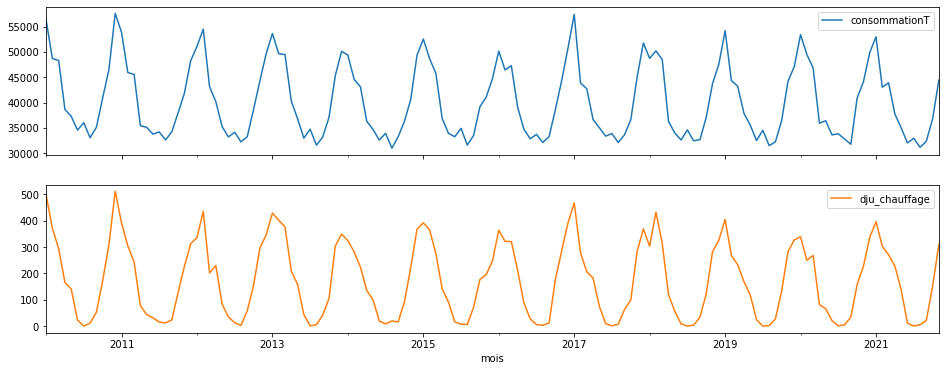

In [36]:
#Visualisation de la consommation et de l'utilisation de chauffage
conso_dju[['consommationT', 'dju_chauffage']].plot(subplots=True, figsize=(16, 6))
plt.show()

On voit que les deux courbes sont super bien corrélées. On va calculer cette correction avec ".corr()" de pandas

In [37]:
#La matrice de correlation
conso_dju[['consommationT', 'dju_chauffage']].corr()

,consommationT,dju_chauffage
consommationT,1.000000,0.970438
dju_chauffage,0.970438,1.000000


Une corrélation de **97%** signifie qu'il y a une forte relation entre les deux variables que l'on étudie consommationT et dju_chauffage.

<Figure size 864x432 with 0 Axes>

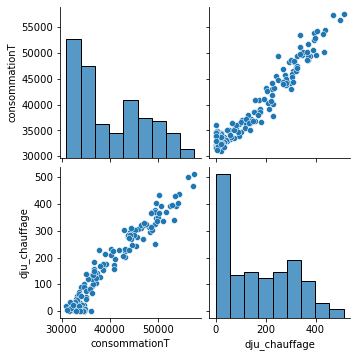

In [38]:
#visualiser notre dataset consommation et dju avec la librairie "seaborn"
figure(figsize=(12, 6))
import seaborn as sns
sns.pairplot(conso_dju)

Pour prédire la demande en électricité pour les années à venir, nous allons utiliser un modèle de régression. Ce modèle nous permettra de faire des prévisions précises sur la demande d'électricité.


In [39]:
#Préparation des données pour établir la Régression linéaire 
y=conso_dju['consommationT']
x=conso_dju['dju_chauffage']
print(x)
print(y)

mois
2010-01-01    499.2
2010-02-01    371.4
2010-03-01    294.5
2010-04-01    165.3
2010-05-01    140.9
              ...  
2021-07-01      0.2
2021-08-01      5.1
2021-09-01     21.0
2021-10-01    150.7
2021-11-01    310.8
Name: dju_chauffage, Length: 143, dtype: float64
mois
2010-01-01    56342
2010-02-01    48698
2010-03-01    48294
2010-04-01    38637
2010-05-01    37284
              ...  
2021-07-01    32959
2021-08-01    31184
2021-09-01    32350
2021-10-01    36762
2021-11-01    44458
Name: consommationT, Length: 143, dtype: int64


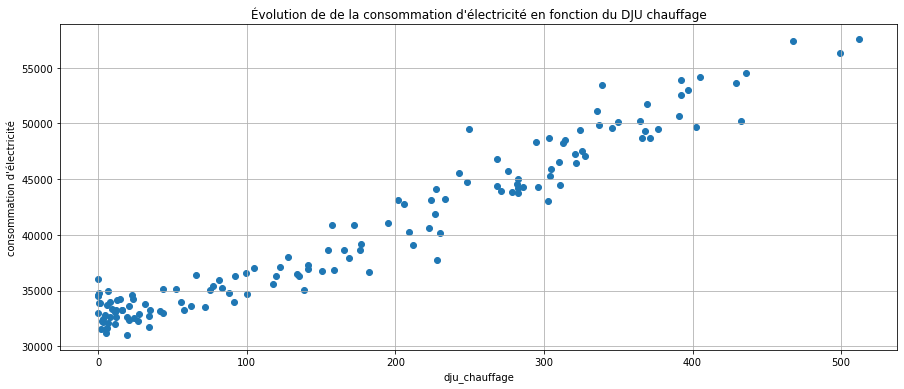

In [40]:
figure(figsize=(15, 6))
plt.scatter(x, y)#Permet d'afficher le nuage de point afin de déterminer votre type de régression
plt.title('Évolution de de la consommation d\'électricité en fonction du DJU chauffage')
plt.xlabel('dju_chauffage')
plt.ylabel('consommation d\'électricité')
plt.grid(True)
plt.show()

On constate que nos points peuvent être reliés par une droite, donc une **régression linéaire simple** paraît pertinente.

## Régression Linéaire avec SKLearn

In [41]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [42]:
#conso_dju

In [43]:
y=conso_dju['consommationT']
X=conso_dju.drop(['consommationT'],axis= 1)# X=dju_chauffage
#print(X, y)

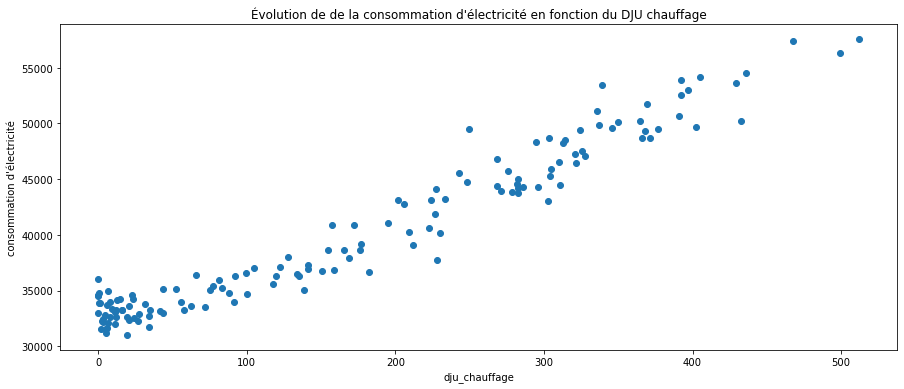

In [44]:
figure(figsize=(15, 6))
plt.scatter(X, y)
plt.title('Évolution de de la consommation d\'électricité en fonction du DJU chauffage')
plt.xlabel('dju_chauffage')
plt.ylabel('consommation d\'électricité')
plt.show()

In [45]:
model=LinearRegression() #Création du model de regression lineaire
model.fit(X, y)#Entrainer le modèle sur les données X, y divisées en deux tableaux
model.score(X, y)# Evaluer le modèle

0.9417490575514472

On obtient un score de 94% c'est le coefficient de détermination est de R²=1-(sum_i=1^n(yi-ŷi)²)/(sum_i=1^n(yi-bar{ŷ}i)²) de la méthode du moindre carrée.

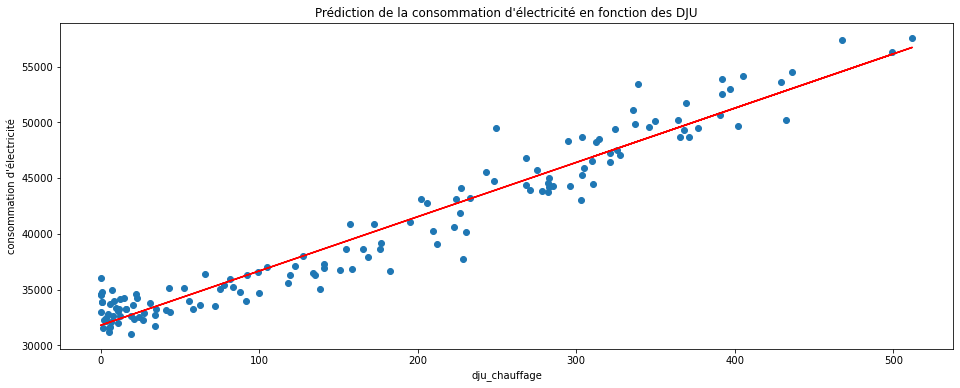

In [46]:
prediction=model.predict(X)#Utiliser le model pour la prédire
figure(figsize=(16, 6))
plt.scatter(X, y)#Nuage de point 
plt.plot(conso_dju['dju_chauffage'], prediction, c='r')#La droite de régression
plt.title('Prédiction de la consommation d\'électricité en fonction des DJU')
plt.xlabel('dju_chauffage')
plt.ylabel('consommation d\'électricité')
plt.show()

In [47]:
print(prediction)


[56096.49699525 49875.31664577 46131.89904895 39842.56805402
 38654.79966179 32896.07012077 31795.92398698 32336.26124738
 34341.83738508 40178.45337805 46886.42405221 56719.58861084
 50878.10471463 46633.29308337 43629.79678007 35573.41690654
 33908.59399611 33324.44560649 32526.10947401 32375.20447336
 32925.27754025 38007.36852996 42826.59274434 47017.85743987
 48152.07889639 53015.11423999 41624.22064237 43006.70516447
 35850.88739161 33499.69012338 32399.54398959 31912.75366491
 34619.30787015 39321.70240661 46214.65340415 48634.00131783
 52688.96472245 51374.6308458  50128.44761461 41994.18128913
 39506.68272999 33918.32980261 31825.13140646 32039.31914932
 33816.10383442 36907.22239617 46589.48195415 48809.24583471
 47587.40211976 45518.54323985 42695.15935667 38391.93288646
 36673.56304032 32725.69350713 32199.95995647 32735.42931362
 32574.78850648 36288.99868382 42631.87661446 49719.54374188
 50878.10471463 49597.8461607  45206.99743205 38664.53546828
 36250.05545785 32565.05

# Régression Linéaire avec Statsmodels

In [48]:
#Préparation des données pour établir la Régression linéaire
y = conso_dju['consommationT']
x = sm.add_constant(conso_dju['dju_chauffage'])

In [49]:
#Régression linéaire Statsmodels
#Definition du modèle et entrainement
reg = sm.OLS(y, x).fit()#(Ordinary Least Squares)
#summary: affichage des caractéristique du modèle de régression construit
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          consommationT   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2280.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           6.21e-89
Time:                        18:22:22   Log-Likelihood:                -1269.3
No. Observations:                 143   AIC:                             2543.
Df Residuals:                     141   BIC:                             2549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           3.18e+04    228.344    139.246

Cette sortie est un résumé des résultats d'une régression linéaire par moindres carrés (OLS en anglais). On a modéliser la relation entre une variable dépendante consommationT  et une variables indépendantes dju_chauffage.

Le but de cette régression est de trouver les coefficients qui minimisent l'**erreur** entre les valeurs prédites par le modèle et les valeurs réelles de la variable dépendante.

**Le R-carré** (R-squared en anglais) indique la qualité du modèle. Plus le R-carré est proche de 1, meilleure est la qualité du modèle. Ici, le R-carré est de 0,942, ce qui suggère que le modèle explique bien les variations de la variable dépendante.

**"coef"** donne les coefficients estimés pour chaque variable indépendante. Ici, on peut voir que le coefficient associé à dju_chauffage est de 48,679. Cela signifie que pour chaque unité supplémentaire de dju_chauffage, on s'attend à ce que la consommationT augmente de 48,679 unités.

**"std err"** donne l'erreur standard associée à chaque coefficient. Plus l'erreur standard est faible, plus le coefficient est fiable. Ici, l'erreur standard associée au coefficient de dju_chauffage est de 1,020, ce qui indique que le coefficient est assez fiable.

**"t"** donne la valeur du test t associé à chaque coefficient. Plus la valeur du test t est élevée, plus le coefficient est significatif. Ici, la valeur du test t associée au coefficient de dju_chauffage est de 47,745, ce qui suggère que le coefficient est statistiquement significatif.

**"P>|t|"** donne la probabilité de ne pas rejeter l'hypothèse nulle pour chaque coefficient. Plus cette probabilité est faible, plus le coefficient est significatif. Ici, la probabilité associée au coefficient de dju_chauffage est de 6,21e-89, ce qui indique que le coefficient est très significatif.

**"0.025 0.975"** donne les limites de confiance des coefficients estimés. Cela signifie que nous pouvons être 95% sûrs que la valeur réelle du coefficient se trouve dans cette plage. Ici, nous pouvons être 95% sûrs que la valeur réelle du coefficient de dju_chauffage se trouve entre 46,663 et 50

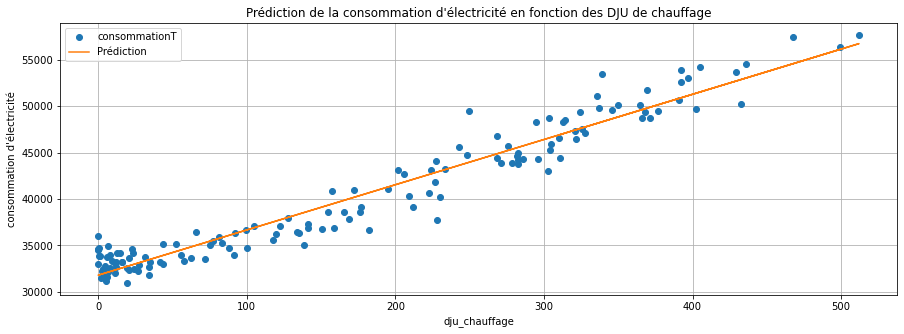

In [50]:
conso_dju.plot(x='dju_chauffage', y='consommationT', style='o', figsize=(15, 5))
prediction=reg.predict(sm.add_constant(conso_dju['dju_chauffage']))#Pour la prédiction
plt.plot(conso_dju['dju_chauffage'], prediction, label="Prédiction")
plt.title('Prédiction de la consommation d\'électricité en fonction des DJU de chauffage')
plt.xlabel('dju_chauffage')
plt.ylabel('consommation d\'électricité')
plt.grid()
plt.legend()
plt.show()


In [51]:
#Coefficient de régression linéaire 
#Affichage des paramètre de la droite de régression estimé dans y=ax+b
reg.params['dju_chauffage']# affichage de a

48.67903246847878

In [52]:
#Calcul de la correction : l'effet DJU est retranché à la consommation totale
#Affichage de b
#b=y-ax
conso_dju['conso_correction'] = conso_dju['consommationT'] - conso_dju['dju_chauffage']*reg.params['dju_chauffage']
print(conso_dju['conso_correction'])

mois
2010-01-01    32041.426992
2010-02-01    30618.607341
2010-03-01    33958.024938
2010-04-01    30590.355933
2010-05-01    30425.124325
                  ...     
2021-07-01    32949.264194
2021-08-01    30935.736934
2021-09-01    31327.740318
2021-10-01    29426.069807
2021-11-01    29328.556709
Name: conso_correction, Length: 143, dtype: float64


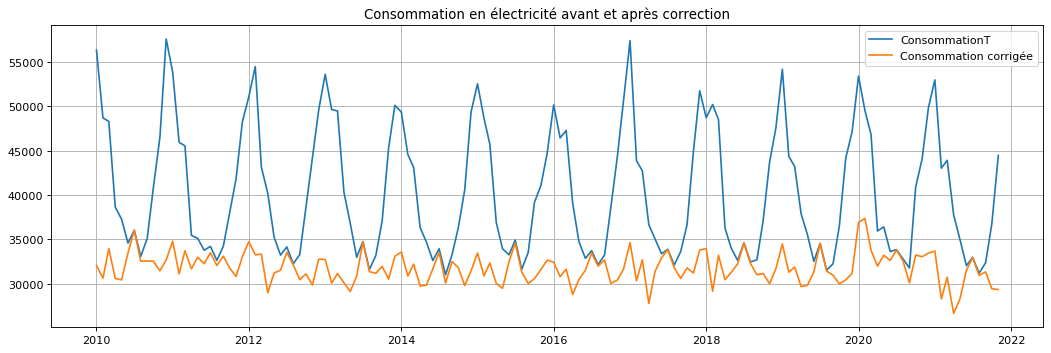

In [53]:
figure(figsize=(16, 5), dpi=80)
#Visualisation de la consommation en électricité avant et après correction
plt.plot(conso_dju['consommationT'], label='ConsommationT')
plt.plot(conso_dju['conso_correction'], label='Consommation corrigée')
plt.title('Consommation en électricité avant et après correction')
plt.legend()
plt.grid(True)
plt.show()

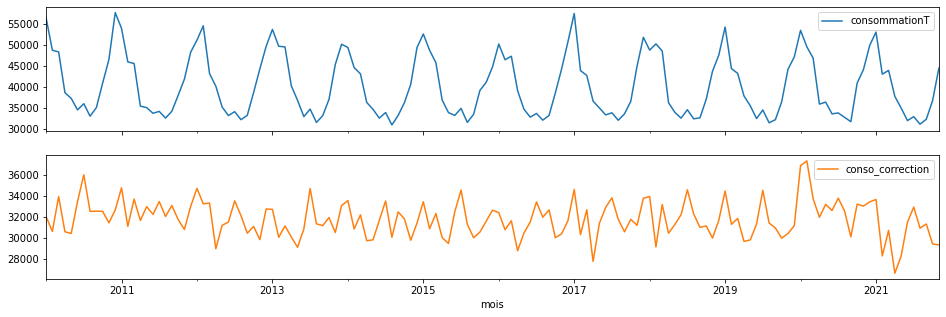

In [54]:
#Visualisation de la consommation et de l'utilisation de chauffage
conso_dju[['consommationT', 'conso_correction']].plot(subplots=True, figsize=(16, 5))
plt.show()

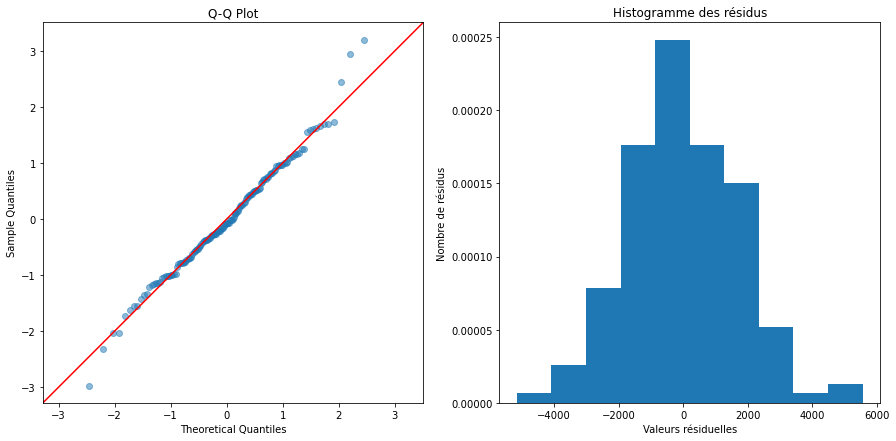

In [55]:
#Distribution des résidus
fig, ax = plt.subplots(1, 2, figsize=(15,7))

plt.hist(reg.resid, density=True)

model_norm_residuals = reg.get_influence().resid_studentized_internal
#ŷ=âx+b^ la droite de reg estimée
QQ = ProbPlot(model_norm_residuals)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', ax=ax[0])

ax[0].set_title('Q-Q Plot')
ax[1].set_title('Histogramme des résidus')
ax[1].set_xlabel('Valeurs résiduelles')
ax[1].set_ylabel('Nombre de résidus')
                
plt.show()

En régression linéaire, on cherche à modéliser la relation entre une variable indépendante et une variable dépendante à l'aide d'une droite. Le résidu d'une observation est la différence entre la valeur observée de la variable dépendante et la valeur prédite par la droite de régression pour la valeur de la variable indépendante correspondante. La normalité des résidus est un critère important pour vérifier la validité de la régression linéaire.

Si les résidus ne sont pas distribués de manière normale, cela peut signifier que la régression linéaire n'est pas appropriée pour modéliser la relation entre les variables

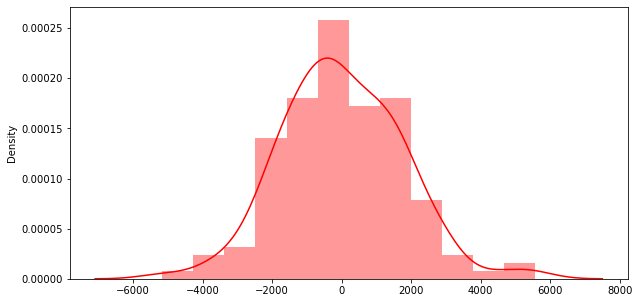

In [56]:
#Verification de l'hypothèse de normalité de residu Epsilon= min(y-(ax+b))
figure(figsize=(10, 5))
sns.distplot(reg.resid, color='red')
plt.show()

La distribution des résidus est satisfaisante.
En effet les résidus suivent bien la distribution théorique d'une loi normale

# Série temporelle avec le modèle additif 

Un modèle de série temporelle est une équation qui précise comment les composantes de la tendance, de la saisonnalité et du bruit s'intègrent pour créer cette série chronologique.

Par exemple X(t)=Tendance(t)+S(t)+epsilon(t)
epsilon(t):le bruit
s(t): variation saisonnière selon la période t
Tendance: l'évolution générale dans le temps

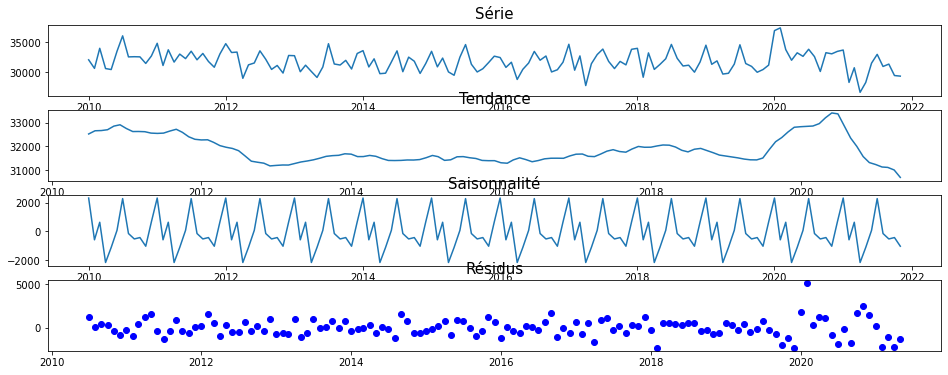

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
#On calcul l'ecart saisonnier entre deux pic ou deux creu
decomposition = seasonal_decompose(conso_dju['conso_correction'],  model='additive')

fig, ax = plt.subplots(4,1, figsize=(16,6))
ax[0].plot(decomposition.observed)
ax[0].set_title('Série', fontsize=15)# serie temporelle X(t)
ax[1].plot(decomposition.trend)
ax[1].set_title('Tendance', fontsize=15)#Tandance: levolution générale dans le temps
ax[2].plot(decomposition.seasonal)
ax[2].set_title('Saisonnalité', fontsize=15)#Saisonnalité  S(t)=Y-tandance
ax[3].plot(decomposition.resid,'bo')
ax[3].set_title('Résidus', fontsize=15)#Residu= X(t)-Tendance(t)-S(t)
plt.show()

Comme on a définit, la série temporelle, nous pouvons prédire la consommation d'énergie pour les prochaines années en prenant en compte l'utilisation du chauffage électrique.


## Prévision par lissage exponentiel par la méthode de Holt-Winters

Le modèle additif de Holt-Winters est une extension du lissage exponentiel de Holt qui permet de capturer la saisonnalité. Cette méthode utilise des valeurs lissées exponentiellement pour prévoir le niveau, la tendance et l'ajustement saisonnier. Cette approche additive saisonnière ajoute le facteur de saisonnalité à la prévision à tendances, ce qui donne lieu à la prévision additive de Holt-Winters.

In [58]:
from statsmodels.tsa.api import ExponentialSmoothing

# Chargement des données de consommation dju
y = np.asarray(conso_dju["conso_correction"])

# Création d'un modèle de lissage exponentiel en utilisant les données de consommation
# La période saisonnière est définie à 71 mois et un trend et une saisonnalité sont ajoutés au modèle
hw = ExponentialSmoothing(y, seasonal_periods=71, trend='add', seasonal='add').fit()

# Prédiction de la consommation pour les 12 prochains mois
hw_pred0 = hw.forecast(12)

# Affichage des prévisions
print(hw_pred0)

[32061.79135883 30355.71785545 31200.17037064 28306.5429269
 29971.88286687 31035.64330712 33002.66309132 31486.4728327
 32174.97077571 29529.24022186 29897.64965973 31184.2099622 ]


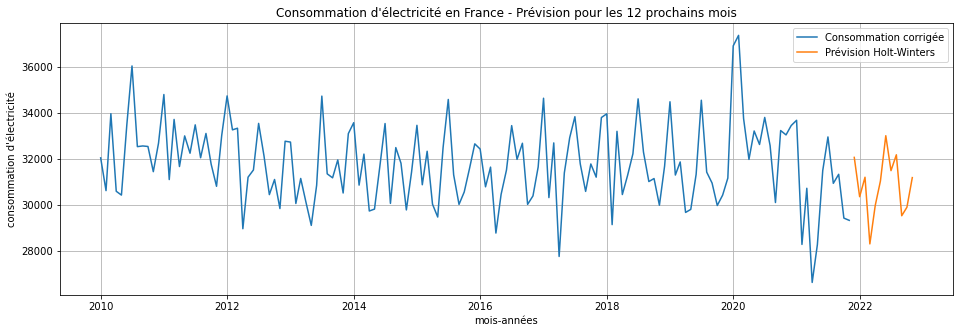

In [59]:

# Visualisation de la prévision sur 12 mois par Holt-Winters
figure(figsize=(16, 5))
plt.plot(conso_dju["conso_correction"], label='Consommation corrigée')
plt.plot(pd.date_range(conso_dju.index[len(y)-1], periods=12, freq='M'), hw_pred0, label='Prévision Holt-Winters')
plt.title("Consommation d'électricité en France - Prévision pour les 12 prochains mois")
plt.xlabel('mois-années')
plt.ylabel('consommation d\'électricité')
plt.legend()
plt.grid(True)
plt.show()


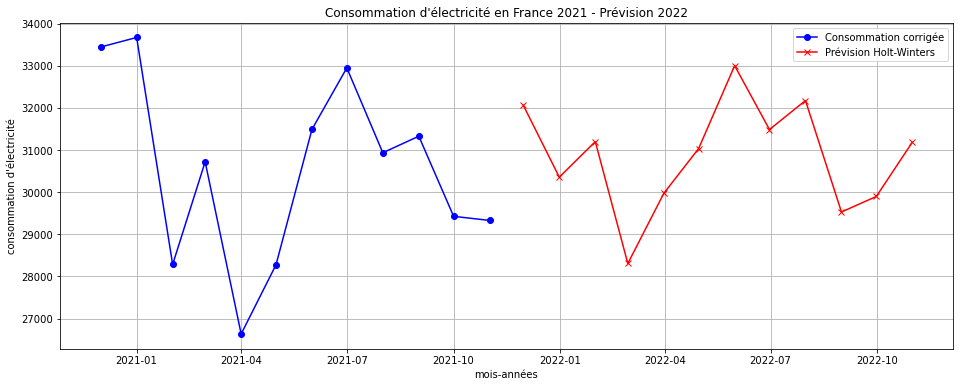

In [60]:
figure(figsize=(16, 6))

plt.plot(conso_dju["conso_correction"].iloc[-12:], marker='o', color='blue', label='Consommation corrigée')
plt.plot(pd.date_range(conso_dju.index[len(y)-1], periods=12, freq='M'), hw_pred0, marker='x', color='red', label='Prévision Holt-Winters')

plt.title("Consommation d\'électricité en France 2021 - Prévision 2022")
plt.xlabel('mois-années')
plt.ylabel('consommation d\'électricité')
plt.grid()
plt.legend()


plt.show()

En effet, la prévision à court terme de la consommation d'électricité est un élément important pour assurer l'équilibre entre la production et la consommation d'électricité au cours d'une journée. Cela permet aux gestionnaires du réseau électrique de s'assurer qu'il y a suffisamment de production pour répondre à la demande, et de prendre les mesures nécessaires pour éviter des coupures de courant ou des surcharges sur le réseau.

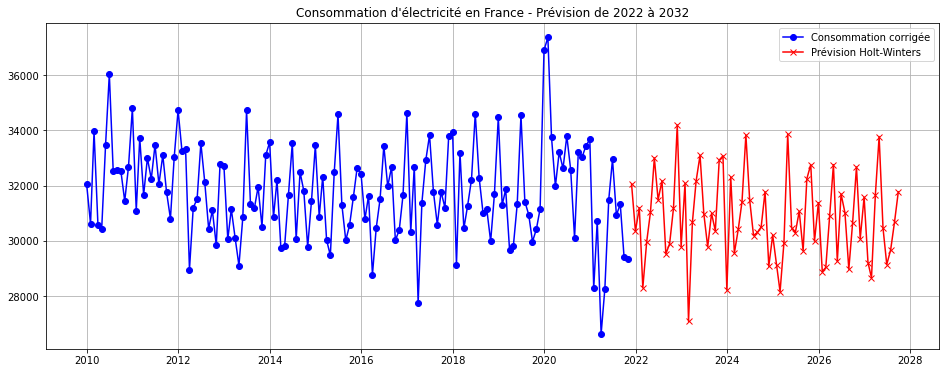

In [61]:
hw_pred = hw.forecast(71)#prévoir sur 71 mois
#Visualisation de la prévision sur 71 mois par Holt-Winters
figure(figsize=(16, 6))
plt.plot(conso_dju["conso_correction"], marker='o', color='blue', label='Consommation corrigée')
plt.plot(pd.date_range(conso_dju.index[len(y)-1], periods=71, freq='M'), hw_pred, marker='x', color='red', label='Prévision Holt-Winters')
plt.title("Consommation d'électricité en France - Prévision de 2022 à 2032")
plt.legend()
plt.grid(True)
plt.show()

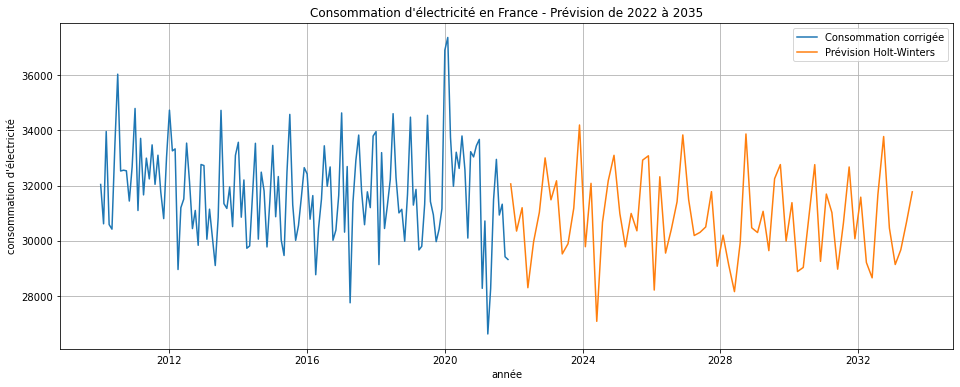

In [62]:
#Visualisation de la prévision sur sur 142 mois par Holt-Winters
figure(figsize=(16, 6))
plt.plot(conso_dju["conso_correction"], label='Consommation corrigée')
plt.plot(pd.date_range(conso_dju.index[len(y)-1], periods=71, freq='2M'), hw_pred, label='Prévision Holt-Winters')
plt.title("Consommation d'électricité en France - Prévision de 2022 à 2035")
plt.xlabel('année')
plt.ylabel('consommation d\'électricité')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion

En conclusion, l'utilisation des techniques de machine learning pour analyser, classer et prédire la consommation d'électricité peut offrir de nombreux avantages, tels que l'optimisation de la production d'électricité et la réduction des coûts associés à la consommation d'énergie. Grâce à leur capacité à extraire des informations précieuses à partir de données complexes, les algorithmes d'apprentissage automatique peuvent jouer un rôle crucial dans la gestion efficace de la consommation d'électricité. Cependant, il est important de noter que cette approche doit être utilisée avec prudence et en prenant en compte les différents facteurs qui peuvent affecter la consommation d'électricité, afin de garantir des résultats précis et fiables.